In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC

In [2]:
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [3]:
train_df.head(5)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [8]:
test_df.head(5)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [15]:
train_df["lang_id"].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

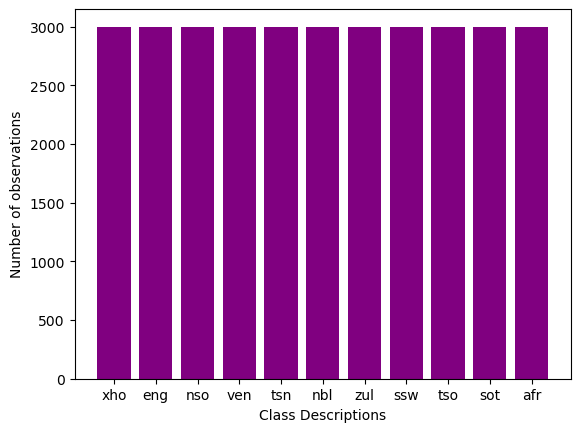

In [20]:
#Creatind a distirbution plot of the occurrence of each language in the data set

labels = train_df["lang_id"].unique()
heights = list(map(lambda lang: len(train_df[train_df["lang_id"] == lang]), labels))
plt.bar(labels,heights,color='purple')
plt.ylabel("Number of observations")
plt.xlabel("Class Descriptions")
plt.show()

In [78]:
#Including a vectoriser and limiting features to assist with computation time
vect = CountVectorizer(lowercase=True,max_features=1000)
X_train = vect.fit_transform(train_df['text'])
unseen_data = vect.transform(test_df['text'])

In [79]:
X_train.shape

(33000, 1000)

In [80]:
X = X_train.toarray()

In [81]:
#Encoding the labels to numbers so it can be processed in a model
le = LabelEncoder()
y = le.fit_transform(train_df['lang_id'])
y

array([9, 9, 1, ..., 1, 9, 4])

In [82]:
#A list of the classes in their correct form
type_labels = list(le.classes_)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [84]:
logreg = LogisticRegression(max_iter=2000,multi_class='ovr')

In [85]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000, multi_class='ovr')

In [86]:
y_pred_test = logreg.predict(X_test)

In [87]:
#Creating a report to measure the performance
print(classification_report(y_test, y_pred_test, target_names=type_labels))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       599
         eng       1.00      1.00      1.00       632
         nbl       0.94      0.89      0.91       595
         nso       1.00      1.00      1.00       582
         sot       1.00      1.00      1.00       610
         ssw       0.90      0.97      0.93       607
         tsn       1.00      1.00      1.00       579
         tso       1.00      1.00      1.00       611
         ven       1.00      1.00      1.00       605
         xho       0.92      0.95      0.93       591
         zul       0.91      0.87      0.89       589

    accuracy                           0.97      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.97      0.97      0.97      6600



In [99]:
#Creating a SVC to compare to other models

SVC_model = SVC(kernel="linear", C=1.0, gamma=0.1)

SVC_model.fit(X_train, y_train)

pred_svc = SVC_model.predict(X_test)
print(classification_report(y_test, pred_svc, target_names=type_labels))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       599
         eng       1.00      1.00      1.00       632
         nbl       0.93      0.89      0.91       595
         nso       0.99      1.00      1.00       582
         sot       0.99      1.00      1.00       610
         ssw       0.88      0.98      0.92       607
         tsn       1.00      0.99      0.99       579
         tso       1.00      1.00      1.00       611
         ven       1.00      1.00      1.00       605
         xho       0.90      0.95      0.93       591
         zul       0.93      0.81      0.86       589

    accuracy                           0.96      6600
   macro avg       0.96      0.96      0.96      6600
weighted avg       0.97      0.96      0.96      6600



In [100]:
#A decision tree classifier to also compare with other models
DTC_model = DTC(random_state = 42)
DTC_model.fit(X_train,y_train)
pred_dt = DTC_model.predict(X_test)
print(classification_report(y_test, pred_dt, target_names=type_labels))

              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       599
         eng       0.99      1.00      0.99       632
         nbl       0.88      0.86      0.87       595
         nso       0.98      0.97      0.98       582
         sot       0.97      0.98      0.97       610
         ssw       0.86      0.93      0.89       607
         tsn       0.97      0.98      0.97       579
         tso       0.98      0.99      0.98       611
         ven       0.99      0.98      0.99       605
         xho       0.89      0.92      0.90       591
         zul       0.86      0.77      0.81       589

    accuracy                           0.94      6600
   macro avg       0.94      0.94      0.94      6600
weighted avg       0.94      0.94      0.94      6600



In [101]:
#Logistic regression is used as it performs best
new_pred = logreg.predict(unseen_data)
predicted_labels = le.inverse_transform(new_pred)
new_df = pd.DataFrame({'index': test_df['index'], 'lang_id': predicted_labels})


In [89]:
new_df.to_csv('Logregpred.csv', index=False)